Title: Matplotlib Hacks
Date: 2019-03-30 19:00
Tags: python
Slug: matplotlib_hacks

New to python and struggling to understand Matplotlib? Actually scratch the first part. Struggling to understand Matplotlib *period*? You are **NOT** alone my friend. 

Let's get some things straight. Matplotlib's design choices are ... let's just say ... not the most straightforward. Weird. Truly incomprehensible sometimes. It is also poorly documented and at times inconsistent. There's people out there who have been working with Python for years  and still can't wrap their heads around Matplotlib. 

Starting to learn Matplotlib was nothing short of a horror story for me. I had a lot of trouble understanding how it worked and got frustrated at myself for it, which was especially discouraging since I was a beginner in data analytics and python programming at the time. It wasn't after completing data visualisation courses on Udacity and DataCamp and most recently General Assembly's Data Science Immersive (DSI) where I'm currently enrolled that I had the "ah-ha- I think I finally know what's going on!" moment. I wish there was someone to tell me that I wasn't a dummy doomed for failure in the data world for having a hard time with Matplotlib in those early days.

In my DSI cohort at General Assembly, there seems to be two camps of people: those who hate Matplotlib and have pretty much given up on it (everyone except me) vs those who think it is not so bad (me). I've strangely come to appreciate some of Matplotlib's functionalities and found myself reaching back to it again and again even though I now have sexy new libraries like Altair under my belt. In this blog post, I am going to give some tips, tricks and general information that has been useful for me in my data viz journey with Matplotlib. I hope I'll be able to convert some of my hardline anti-Matplotlib class mates to the "matplotlib is not so bad! let's love and appreciate it!" camp. After all, matplotlib is the foundation upon which the bulk of python's data visualisation libraries are built. 

### Making pretty charts
----

We can all probably agree that Matplotlib's default charting style is really ugly. Let's see how we can make simple Matplotlib charts a bit easier on the eyes with a few simple lines of code. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import HTML

# spin up a random dataframe of size 100
np.random.seed(13)
X = np.random.normal(50, 20, size=100) 
Y = 2 * X + np.random.randint(25)
Z = np.random.choice(['pink', 'blue', 'green', 'red'], p=[0.1, 0.3, 0.4, 0.2], size=100)
df = pd.DataFrame({'X': X, 'Y': Y, 'Z': Z})
HTML(df.head().to_html(classes="table table-stripped table-hover"))

,X,Y,Z
0,35.752187,85.504374,green
1,65.075328,144.150655,green
2,49.109938,112.219877,red
3,59.036247,132.072494,red
4,76.902034,167.804068,blue


Let's create a simple scatter plot of X against Y.

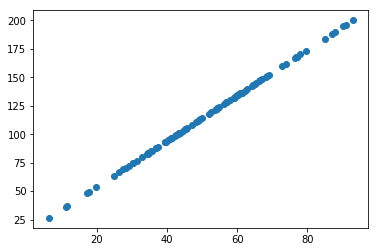

In [2]:
plt.scatter(X, Y)

Firstly, we can disable the text output of Matplotlib by placing a `;` at the end of the code. 

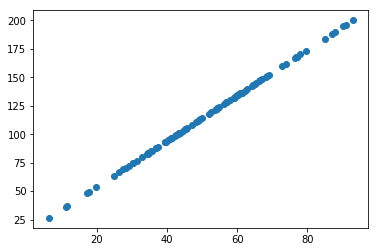

In [3]:
plt.scatter(X, Y);

The resolution of this chart is not the most optimal. We can improve it by running the following Ipython magic command, which improves the definition of image outputs. I usually do this at the beginning of my notebook, right below my imports so all my charts look nice and sharp. `%config InlineBackend.figure_format = 'retina'` works as well.

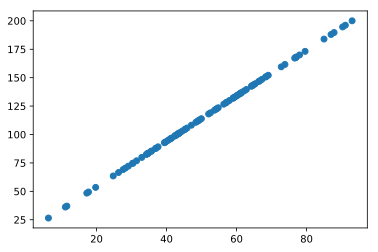

In [4]:
%config InlineBackend.figure_format = 'svg'
plt.scatter(X, Y);

See? Much better! But, I am not sure if I am a fan of the bland white background. Let's put some grid lines in there.

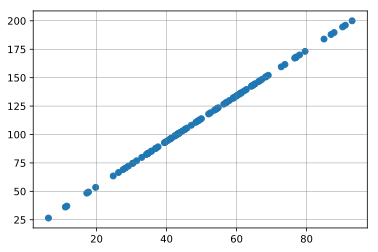

In [5]:
plt.scatter(X, Y);
plt.grid(color='gray', linewidth=0.4)

We can get more granular with our grid lines if we want to by turning on minor ticks, and then customizing the minor grid by setting the `which` argument to `minor` inside `plt.grid()`. 

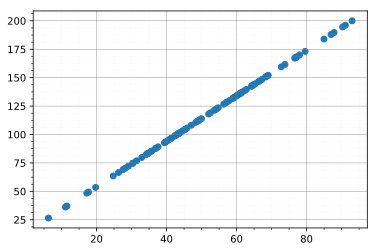

In [6]:
plt.scatter(X, Y);
plt.grid(color='gray', linewidth=0.4)
plt.minorticks_on()
plt.grid(color='lightgray', linestyle=':', linewidth=0.2, which='minor')

You may also notice that it's hard to separate more crowded data points from sparse data points. The `alpha` argument allows us to adjust the transparency of each point so overlapping ones can be distinguished. An `alpha` of 1/2 means an opaque point will appear only if there is at least 2 points that fall into that region. Decreasing the alpha will increase the threshold for opaque points.

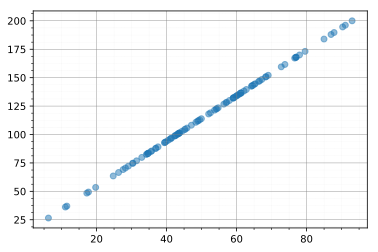

In [7]:
plt.scatter(X, Y, alpha=1/2);
plt.grid(color='gray', linewidth=0.4)
plt.minorticks_on()
plt.grid(color='lightgray', linestyle=':', linewidth=0.2, which='minor')

Next, let's spin up a bar chart to demonstrate how changing the default colors can help us achieve a more visually appealing aesthetic. 

In [8]:
# group df by each color, get sum of the X column
s = df.groupby('Z')[['X']].sum()

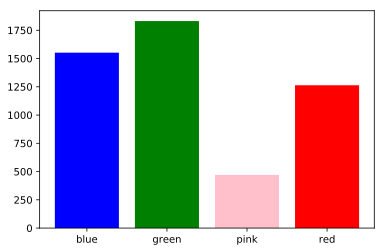

In [9]:
plt.bar(s.index, s['X'], color=['blue','green','pink','red']);

Personally, I am not thrilled with these colors. Thankfully, Matplotlib has a wide range of color options we can use. The full list can be viewed [here](https://matplotlib.org/gallery/color/named_colors.html). I also usually like to add an edgecolor to my charts make them look a bit neater.

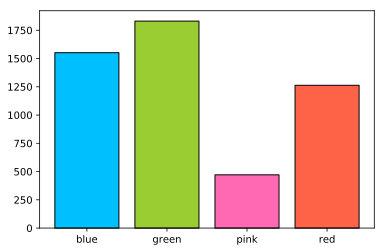

In [10]:
plt.bar(s.index, s['X'], color=['deepskyblue','yellowgreen','hotpink','tomato'], edgecolor='black');

Matplotlib also has alternative styling options we can use if we want to change the look of the figure. Here is a list of all the available styles. 

In [11]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [12]:
# run this code to set a style
plt.style.use('fivethirtyeight') 

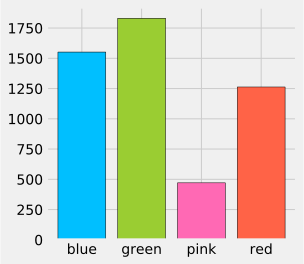

In [13]:
plt.figure(figsize= (4, 4))
plt.bar(s.index, s['X'], color=['deepskyblue','yellowgreen','hotpink','tomato'], edgecolor='black');

### Figures and axes
----

You'll often see people use matplotlib in one of the following two ways: 

1. Call plotting functions directly on the pyplot object like `plt.plot()`, `plt.scatter()`, `plt.bar()`, etc

2. Run `fig, ax = plt.subplots()` first, and then call plotting functions on ax like `ax.plot()`, `ax.bar()`, etc

What's the difference between them? 

TL;DR not that much, most of the time

`plt.subplots()` is a function that returns a tuple containg a figure and an axes object. `fig, ax = plt.subplots()` unpacks this tuple onto the fig and ax variables. Fig stores the entire figure, and ax stores the axes object created.

By running `fig, ax = plt.subplots()` you are essentially creating a matplotlib object for your plot. With `plt.plot()`, you are still able to return a chart, but you are not creating an object. Having your chart defined as an object is useful, for example, if you want to save it as png (in which case you would call `fig.savefig('filename.png')`) or if you are using a for loop to create multiple subplots. It can also be useful when you need access to more intricate functionalities, because creating a matplotlib object unlocks additional matplotlib features. But, for the most part, `plt.plot()` will get done what you need to get done. 

### Subplots
----

With subplots, we can place multiple charts on the same figure for ease of viewing. It's especially useful when we are faceting charts by a categorical variable. Here is an example. 

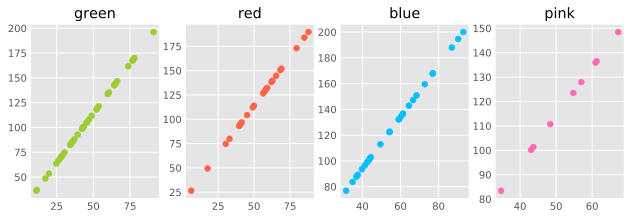

In [14]:
# look at X vs Y, faceted by the Z column

 # let's try a different style
plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(9.5, 3))
colors=['yellowgreen','tomato','deepskyblue','hotpink']
 
# example of the for loop i talked about earlier
for i, color in enumerate(df.Z.unique()): 
    filtered_df = df[df.Z == color]
    ax[i].scatter(filtered_df.X, filtered_df.Y, c=colors[i])
    ax[i].set(title=color)

What's happening here? I created my subplot in the first line. I set it to have 1 row and 4 columns, and I specified that each subplot should be 9.5 inches wide and 3 inches tall. Then, I created a loop that goes through all the unique elements in Z, filters the dataframe by each element, and creates a scatterplot of the filtered dataframe's X's vs Y's. 

One thing I don't like about this figure is that the X and Y ticks don't match, so it's hard to visually spot the differences in the spread of different colors. Normally, we would want such information to be immediately noticeable for our readers. I'll specify xlim and ylim parameters inside the set method so all the subplots have the same X and Y ticks.

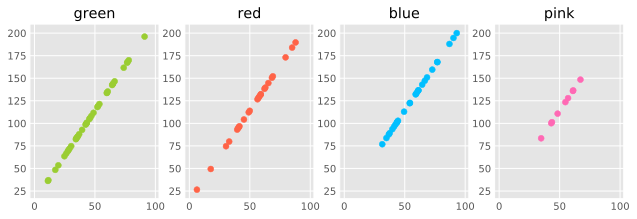

In [15]:
fig, ax = plt.subplots(1, 4, figsize=(9.5, 3))
colors=['yellowgreen','tomato','deepskyblue','hotpink']
 
for i, color in enumerate(df.Z.unique()):
    filtered_df = df[df.Z == color]
    ax[i].set(title=color, xlim=(X.min()-10, X.max()+10), ylim=(Y.min()-10, Y.max()+10)) 
    ax[i].scatter(filtered_df.X, filtered_df.Y, c=colors[i])

The difference is subtle but important. See how different the pink subplot looks now, and how easier it is to see that it has a much tighter range than all the other colors.

### Customization 
----

We have created pretty charts and subplots but we haven't yet customized our plots with titles, X and Y labels, fonts, markers etc. Matplotlib has a *toooon* of customization options, and that's actually my favorite aspect about it (and also why I keep going back to it although it's kind of a hassle to use). Here, I'll show you a few that I most frequently use.

To demonstrate this I am going to create a new column A and populate it based on the color in Z. My goal is to create a scatter plot of X vs A, in which the points will fall into clear cut groups based on what color they are. 

In [16]:
for size, color in zip([250, 80, 175, 30],['blue','green','pink','red']):    
    color_index = df[df.Z == color].index
    color_array = np.random.normal(size, 10, size = len(color_index))
    for i in range(len(color_index)):
        df.at[color_index[i], 'A'] = color_array[i]

Before going further, I need to reset the style to matplotlib's default because alternative styles can override the customizations we set.

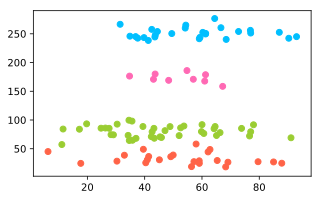

In [17]:
# reset style to default matplotlib
import matplotlib as mpl
plt.rcParams.update(mpl.rcParamsDefault) 

plt.figure(figsize= (5, 3))

plt.scatter(df[df['Z'] == 'green'].X, df[df['Z'] == 'green'].A
            , color='yellowgreen');

plt.scatter(df[df['Z'] == 'blue'].X, df[df['Z'] == 'blue'].A
            , color='deepskyblue');

plt.scatter(df[df['Z'] == 'pink'].X, df[df['Z'] == 'pink'].A
            , color='hotpink');

plt.scatter(df[df['Z'] == 'red'].X, df[df['Z'] == 'red'].A
            , color='tomato');

Now let's name our plot and axes so our audience can understand what this chart is displaying.

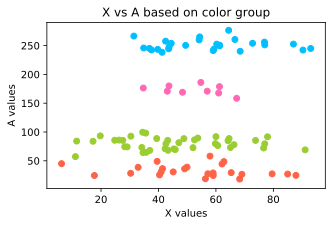

In [18]:
plt.figure(figsize= (5, 3))

plt.scatter(df[df['Z'] == 'green'].X, df[df['Z'] == 'green'].A
            , color='yellowgreen');

plt.scatter(df[df['Z'] == 'blue'].X, df[df['Z'] == 'blue'].A
            , color='deepskyblue');

plt.scatter(df[df['Z'] == 'pink'].X, df[df['Z'] == 'pink'].A
            , color='hotpink');

plt.scatter(df[df['Z'] == 'red'].X, df[df['Z'] == 'red'].A
            , color='tomato');

plt.title('X vs A based on color group');
plt.xlabel('X values');
plt.ylabel('A values');

Not sure I like the font, size and location of the title and labels. I can play around with these by changing the fontname, fontsize and loc arguments. I could also change the color if I wanted to with the color argument, but I like black for titles and labels.

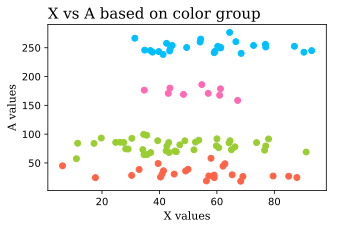

In [19]:
plt.figure(figsize= (5, 3))

plt.scatter(df[df['Z'] == 'green'].X, df[df['Z'] == 'green'].A
            , color='yellowgreen');

plt.scatter(df[df['Z'] == 'blue'].X, df[df['Z'] == 'blue'].A
            , color='deepskyblue');

plt.scatter(df[df['Z'] == 'pink'].X, df[df['Z'] == 'pink'].A
            , color='hotpink');

plt.scatter(df[df['Z'] == 'red'].X, df[df['Z'] == 'red'].A
            , color='tomato');

plt.title('X vs A based on color group', fontname='serif'
          , fontsize=15, loc='left');
plt.xlabel('X values', fontname='serif', fontsize=11);
plt.ylabel('A values', fontname='serif', fontsize=11);

Finally, I want to change the markers of the scatter plots for each color and put an appropriate legend.

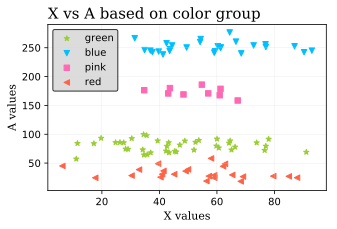

In [20]:
plt.figure(figsize= (5, 3))

plt.scatter(df[df['Z'] == 'green'].X, df[df['Z'] == 'green'].A
            , color='yellowgreen', marker='*', s=30, label='green');

plt.scatter(df[df['Z'] == 'blue'].X, df[df['Z'] == 'blue'].A
            , color='deepskyblue', marker='v', s=30, label='blue');

plt.scatter(df[df['Z'] == 'pink'].X, df[df['Z'] == 'pink'].A
            , color='hotpink', marker='s', s=30, label='pink');

plt.scatter(df[df['Z'] == 'red'].X, df[df['Z'] == 'red'].A
            , color='tomato', marker='<', s=30, label='red');

plt.legend(facecolor='lightgrey', edgecolor='black', fontsize=10);
plt.grid(color='lightgrey', linewidth=0.2); 
plt.title('X vs A based on color group', fontname='serif'
          , fontsize=15, loc='left');
plt.xlabel('X values', fontname='serif', fontsize=11);
plt.ylabel('A values', fontname='serif', fontsize=11);

Note that if we had defined matplotlib objects to create the charts, we would use the following methods on our axes objects in place of the ones we used:

1. `plt.title()` --> `ax.set_title()`

2. `plt.xlabel()` --> `ax.set_xlabel()`

3. `plt.ylabel()` --> `ax.set_ylabel()`

### Some extra stuff 
----

To change the size of a chart you have to run `plt.figure(figsize=(width, height))` before you run your plotting function. Otherwise, the size of your chart won't actually change. This was something that I mixed up a lot in the past. This is *unless* you are defining matplotlib objects with `fig, ax = plt.subplots()`. In that case, you set your figsize inside the `subplots()` method. 

I'm going to demonstrate this with a time series chart, so I'm adding a column of random dates to the dataframe.

In [21]:
df['date'] = pd.date_range('20180101','20181230')[0:100]

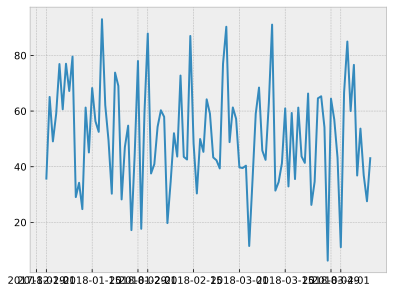

<Figure size 1200x500 with 0 Axes>

In [22]:
# set new style
plt.style.use('bmh')  

# ignore this part, running it to disable a depreciation warning
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.plot(df['date'], df['X']);
plt.figure(figsize= (10, 2.5));

Yikes. As can be seen, the size of the plot was not set to 10 inches wide and 2.5 inches tall when we ran `plt.figure()` after `plt.plot()`. Instead of changing figure size, the `plt.figure()` function returned the text output we see below the chart. In other bad news, the xtick labels are overlapping and the frequency with which matplotlib has decided to show the dates doesn't make sense. Let's fix these. It would be nice, for example, if we had x tick labels for the Monday of every week. 

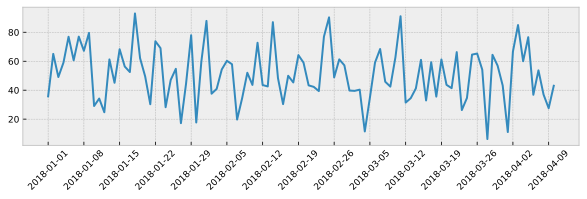

In [23]:
plt.figure(figsize= (10, 2.5))
plt.plot(df['date'], df['X']);

# rotate xticks by a 45 degree angle so they're more legible
plt.xticks(rotation=45, fontsize=9) 
plt.yticks(fontsize=9)

# module we need to import so matplotlib can identify days of week from datetime 
import matplotlib.dates as mdates 

# get current axis
ax = plt.gca() 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=0, interval=1)) # tick on mondays every week

What happened here? I had to import a submodule called mdates from the dates module of Matplotlib to achieve the weekly X tick appearance I was aiming for. Since the xaxis method only exists for axes objects, I had to get the current axis of my plot with the `.gca()` method.  This is an example for when you may actually need to define matplotlib objects!

Then, by passing the weekday locator inside the set_major_locator method, I grabbed the days that were Mondays from the date column of my dataframe and set them as my X tick labels.

To be honest, I didn't know how to this. I just googled something along the lines of "matplotlib set custom X ticks for dates" and was able to find an answer within max 10-15 minutes. *That's precisely the beauty of Matplotlib*; it's been around for so long that there is an answer for pretty much any problem you may encounter! 

... aand that's a wrap! I wish you all the very best in your data viz journey with Matplotlib!